Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, kamu bisa dengan cepat mengetahui nilai pasar mobilmu. Kamu memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugasmu adalah membuat suatu model yang mampu menentukan nilai pasar mobil.
Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

In [1]:
# Import library awal
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Persiapan Data

In [2]:
data = pd.read_csv('/datasets/car_data.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
print(f'jumlah missing value:\n{data.isna().sum()}')
print()
print('persentase missing value:')
print(data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']].isna().sum() / len(data)* 100)

jumlah missing value:
DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

persentase missing value:
VehicleType    10.579368
Gearbox         5.596709
Model           5.560588
FuelType        9.282697
NotRepaired    20.079070
dtype: float64


**Catatan** 

Mising value terdapat di 5 kolom yang berbeda. Kolom tersebut berisi nilai kategorikal.

**Ekploarsi kolom numerikal**

In [5]:
data.shape

(354369, 16)

In [6]:
data['Price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64

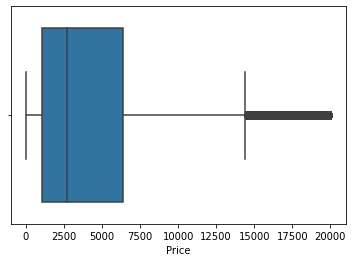

In [7]:
sns.boxplot(x=data['Price']);

In [8]:
data['Power'].describe()

count    354369.000000
mean        110.094337
std         189.850405
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

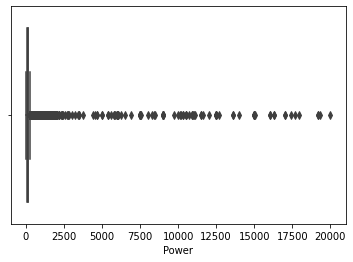

In [9]:
sns.boxplot(x=data['Power']);

In [10]:
data['Mileage'].describe()

count    354369.000000
mean     128211.172535
std       37905.341530
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Mileage, dtype: float64

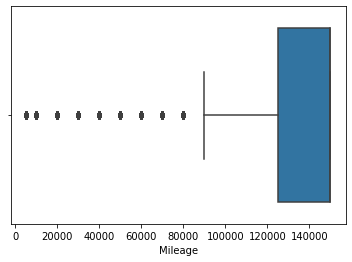

In [11]:
sns.boxplot(x=data['Mileage']);

In [12]:
data['RegistrationYear'].describe()

count    354369.000000
mean       2004.234448
std          90.227958
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

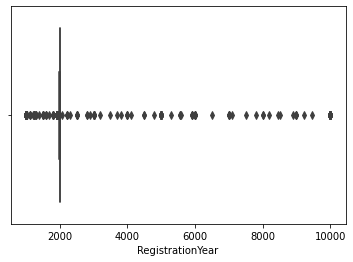

In [13]:
sns.boxplot(x=data['RegistrationYear']);

In [14]:
data['RegistrationMonth'].describe()

count    354369.000000
mean          5.714645
std           3.726421
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: RegistrationMonth, dtype: float64

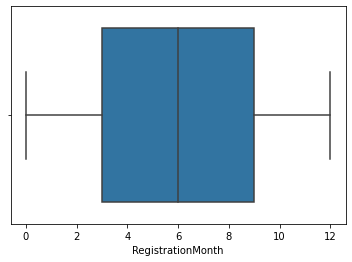

In [15]:
sns.boxplot(x=data['RegistrationMonth']);

In [16]:
data['NumberOfPictures'].describe()

count    354369.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: NumberOfPictures, dtype: float64

In [17]:
data['PostalCode'].describe()

count    354369.000000
mean      50508.689087
std       25783.096248
min        1067.000000
25%       30165.000000
50%       49413.000000
75%       71083.000000
max       99998.000000
Name: PostalCode, dtype: float64

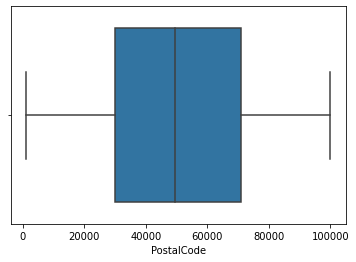

In [18]:
sns.boxplot(x=data['PostalCode']);

**Catatan**

Pada kolom numerikal terdapat beberapa catatan, diantaranya:
1. Beberapa kolom memiliki outlier.
2. Pada kolom `NumberOfPictures` hanya berisi angka 0 saja.
3. Pada kolom `Power` nilai 0 mendominasi.
4. Pada kolom `RegistrationYear` terlalu banyak nilai yang tidak masuk akal.
5. Pada kolom `PostalCode` nilai nya beragam dan sepertinya data ini tidak diperlukan.

### Drop data yang tidak diperlukan

Dari langkah-langkah yang telah dilakukan, ada beberapa catatan untuk mempersiapkan data agar data dapat diuji dengan baik. Sebelum itu, mari rapihkan data yang ada sesuai dengan catatan yang telah dibuat diatas.

In [19]:
data.head(2)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46


In [20]:
column_notused = ['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen']


In [21]:
data = data.drop(column_notused, axis=1)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


In [22]:
data = data[data['RegistrationYear'] > 2000]
data = data[data['RegistrationYear'] < 2024]
data = data[data['Power'] != 0].reset_index(drop=True)
data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth
count,206829.000000,206829.000000,206829.000000,206829.000000,206829.000000
mean,6158.470108,2006.938829,130.434746,123260.906353,6.080458
std,4763.427182,4.484838,191.845816,39191.578278,3.545320
min,0.000000,2001.000000,1.000000,5000.000000,0.000000
25%,2490.000000,2003.000000,86.000000,100000.000000,3.000000
50%,4850.000000,2006.000000,116.000000,150000.000000,6.000000
75%,8800.000000,2010.000000,150.000000,150000.000000,9.000000
max,20000.000000,2019.000000,19211.000000,150000.000000,12.000000


In [23]:
data.shape

(206829, 11)

### Mengatasi missing value

In [24]:
((data.isna().sum() / len(data)) * 100).sort_values()

Price                 0.000000
RegistrationYear      0.000000
Power                 0.000000
Mileage               0.000000
RegistrationMonth     0.000000
Brand                 0.000000
Gearbox               1.884165
Model                 3.432787
FuelType              6.308110
VehicleType           9.386498
NotRepaired          13.156762
dtype: float64

In [25]:
data = data.fillna('unknowm')
data.isna().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

In [26]:
column_categorycal = ['Gearbox', 'Model', 'FuelType', 'VehicleType', 'NotRepaired']

In [27]:
for column in column_categorycal:
    print(f'Column {column}: \n{len(data[column].value_counts())} category')

Column Gearbox: 
3 category
Column Model: 
246 category
Column FuelType: 
8 category
Column VehicleType: 
9 category
Column NotRepaired: 
3 category


**Catatan**

Ada beberapa catatan dari langkah-langkah yang telah dilakukan:
1. Terdapat beberapa kolom yang di drop karena kolom-kolom tersebut tidak diperlukan untuk pelatihan model. kolom-kolom tersebut adalah:
    - `DateCrawled`
    - `DateCreated`
    - `NumberOfPictures`
    - `PostalCode`
    - `LastSeen`
2. Dataset difilter dari beberapa kolom yang bermasalah nilainya. Dataset tersebut diatasi dengan cara berikut:
    - Dataset memuat data dengan kolom `RegistrationYear` yang memiliki nilai diatas 2000 dan dibawah 2024.
    - Dataset menyimpan data dengan kolom `Power` yang tidak memiliki 0.
3. Missing value terdapat di 5 kolom yang berbeda, Kolom tersebut adalah kolom-kolom kategorikal. Jadi kolom-kolom yang memuat missing value diisi dengan 'unknown'.

## Pelatihan Model

Sebelum melatih model, mari bagi dataset nya terlebih dahulu. Data yang digunakan adalah data dengan one hot endcoder agar lebih mudah untuk proses pelatihan dengan berbagai model yang ada.

In [28]:
data_ohe = data
data_ohe = pd.get_dummies(data_ohe)
data_ohe

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_no,NotRepaired_unknowm,NotRepaired_yes
0,18300,2011,190,125000,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9800,2004,163,125000,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1500,2001,75,150000,6,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3600,2008,69,90000,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2200,2004,109,150000,8,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206824,7900,2010,140,150000,7,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
206825,3999,2005,3,150000,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206826,5250,2016,150,150000,12,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206827,3200,2004,225,150000,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
dataohe_train_valid, dataohe_test = train_test_split(data_ohe, test_size=0.1, random_state=1234)
dataohe_train, dataohe_valid = train_test_split(dataohe_train_valid, test_size=0.2, random_state=1234)

print(dataohe_train.shape)
print(dataohe_valid.shape)
print(dataohe_test.shape)

(148916, 314)
(37230, 314)
(20683, 314)


In [31]:
features_train = dataohe_train.drop(['Price'], axis=1)
target_train = dataohe_train['Price']

features_valid = dataohe_valid.drop(['Price'], axis=1)
target_valid = dataohe_valid['Price']

features_test = dataohe_test.drop(['Price'], axis=1)
target_test = dataohe_test['Price']

In [32]:
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_test.shape)

(148916, 313) (148916,)
(37230, 313) (37230,)
(20683, 313) (20683,)


Langkah selanjutnya adalah melatih model dan membandingkannya dengan gradient boosting. Sebelum itu mari import library yang diperlukan

In [33]:
from sklearn.metrics import mean_squared_error

#model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#gradien boosting
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

import time

### Linear Regressor

In [34]:
%%time

model1 = LinearRegression()
model1.fit(features_train, target_train)


CPU times: user 9.34 s, sys: 3.52 s, total: 12.9 s
Wall time: 14.8 s


LinearRegression()

In [35]:
%%time

mode1_predict = model1.predict(features_train)
print('lr-rmse train: ', mean_squared_error(target_train, mode1_predict)** 0.5)

mode1_predict = model1.predict(features_valid)
print('lr-rmse valid: ', mean_squared_error(target_valid, mode1_predict)** 0.5)

mode1_predict_test = model1.predict(features_test)
print('lr-rmse test:', mean_squared_error(target_test, mode1_predict_test)** 0.5)

lr-rmse train:  2618.672121298498
lr-rmse valid:  2631.121496519814
lr-rmse test: 2607.0815860892294
CPU times: user 240 ms, sys: 300 ms, total: 540 ms
Wall time: 813 ms


**Catatan**

1. Model Linear Regression membutuhkan waktu untuk melatih model yaitu 11.8 s
2. Kecepatan prediksi 608 ms
3. Kualitas model dengan metrik RMSE, yaitu:
    - lr-RMSE_Train: 2618.672121298498
    - lr-RMSE_Valid: 2631.121496519814
    - lr-RMSE_Test: 2607.0815860892294

### Decision Tree Classifier

In [36]:
%%time

max_depth = [1, 2, 4, 6, 8, 10]

for depth in max_depth:
    model2 = DecisionTreeRegressor(max_depth=depth)
    model2.fit(features_train, target_train)
    
    pred2_train = model2.predict(features_train)
    pred2_valid = model2.predict(features_valid)
    
    print('depth:', depth)
    print('dtree-rmse train:', mean_squared_error(target_train, pred2_train)** 0.5)
    print('dtree-rmse valid:', mean_squared_error(target_valid, pred2_valid)** 0.5)
    


depth: 1
dtree-rmse train: 4228.614404567332
dtree-rmse valid: 4207.9564251241145
depth: 2
dtree-rmse train: 3672.1822393614834
dtree-rmse valid: 3636.1807387943554
depth: 4
dtree-rmse train: 2989.776892299905
dtree-rmse valid: 2974.2977812982826
depth: 6
dtree-rmse train: 2558.9975415634735
dtree-rmse valid: 2576.1186190353997
depth: 8
dtree-rmse train: 2332.432920668089
dtree-rmse valid: 2372.2134232918856
depth: 10
dtree-rmse train: 2155.410297611313
dtree-rmse valid: 2266.5478665931023
CPU times: user 10.7 s, sys: 1.04 s, total: 11.8 s
Wall time: 15.7 s


Untuk model decisionTree, parameter yang digunakan untuk mencari nilai rmse terbaik adalah max_depth 10. 

In [37]:
%%time
model2 = DecisionTreeRegressor(max_depth=10)
model2.fit(features_train, target_train)


CPU times: user 2.95 s, sys: 33.9 ms, total: 2.98 s
Wall time: 2.99 s


DecisionTreeRegressor(max_depth=10)

In [38]:
%%time

pred2_train = model2.predict(features_train)
pred2_valid = model2.predict(features_valid)
pred2_test = model2.predict(features_test)

print('dtree-rmse train:', mean_squared_error(target_train, pred2_train)** 0.5)
print('dtree-rmse valid:', mean_squared_error(target_valid, pred2_valid)** 0.5)
print('dtree-rmse test:', mean_squared_error(target_test, pred2_test)** 0.5)

dtree-rmse train: 2155.410297611313
dtree-rmse valid: 2267.3835013054027
dtree-rmse test: 2219.118699609312
CPU times: user 174 ms, sys: 90 ms, total: 264 ms
Wall time: 273 ms


**Catatan**

1. Model DecisionTree membutuhkan waktu untuk melatih model yaitu 3.01 s
2. Kecepatan prediksi 264 ms
3. Kualitas model dengan metrik RMSE, yaitu:
    - dtree-rmse train: 2155.410297611313
    - dtree-rmse valid: 2265.7402678480676
    - dtree-rmse test: 2224.061926180606

### Random Forest

In [39]:
%%time

max_depth = [6, 8, 10]

for depth in max_depth:
    model3 = RandomForestRegressor(max_depth=depth, n_estimators=100)
    model3.fit(features_train, target_train)
    
    pred_train = model3.predict(features_train)
    pred_valid = model3.predict(features_valid)
    
    
    print('depth:', depth)
    print('rf-rmse train:', mean_squared_error(target_train, pred_train)** 0.5)
    print('rf-rmse valid:', mean_squared_error(target_valid, pred_valid)** 0.5)

depth: 6
rf-rmse train: 2515.161040880827
rf-rmse valid: 2529.72936654388
depth: 8
rf-rmse train: 2271.066828419149
rf-rmse valid: 2305.4584453973275
depth: 10
rf-rmse train: 2061.622944988127
rf-rmse valid: 2149.7158550140402
CPU times: user 8min 6s, sys: 454 ms, total: 8min 6s
Wall time: 9min 1s


Untuk model random forest, parameter yang digunakan untuk mencari nilai rmse terbaik adalah max_depth 10.

In [40]:
%%time

model3 = RandomForestRegressor(max_depth=10, n_estimators=100)
model3.fit(features_train, target_train)


CPU times: user 3min 5s, sys: 110 ms, total: 3min 5s
Wall time: 3min 5s


RandomForestRegressor(max_depth=10)

In [41]:
%%time

pred_train = model3.predict(features_train)
pred_valid = model3.predict(features_valid)
pred_test = model3.predict(features_test)    
    
print('rf-rmse train:', mean_squared_error(target_train, pred_train)** 0.5)
print('rf-rmse valid:', mean_squared_error(target_valid, pred_valid)** 0.5)
print('rf-rmse test:', mean_squared_error(target_test, pred_test)** 0.5)

rf-rmse train: 2061.3155235383265
rf-rmse valid: 2148.8221638935024
rf-rmse test: 2129.4431596190907
CPU times: user 3.01 s, sys: 112 ms, total: 3.12 s
Wall time: 3.13 s


**Catatan**

1. Model RandomForest membutuhkan waktu untuk melatih model yaitu 3min 10s
2. Kecepatan prediksi 3.16 s
3. Kualitas model dengan metrik RMSE, yaitu:
    - rf-rmse train: 2063.361772146016
    - rf-rmse valid: 2149.2526931961634
    - rf-rmse test: 2130.846669252098

### Gradient boosting

Untuk gradient boosting yang akan dilakukan, paramater-parameter yang digunakan adalah parameter yang di set secara random karna tujuan dari gradient boosting ini adalah untuk membandingkan saja dengan 3 model diatas.

**1. LightGBM**

In [42]:
%%time

lgb_model = lgb.LGBMRegressor(num_leaves=20, n_estimators=100, learning_rate=0.1)
lgb_model.fit(features_train, target_train)

CPU times: user 3.73 s, sys: 108 ms, total: 3.84 s
Wall time: 3.96 s


LGBMRegressor(num_leaves=20)

In [43]:
%%time

lgb_pred_train = lgb_model.predict(features_train)
lgb_pred_valid = lgb_model.predict(features_valid)
lgb_pred_test = lgb_model.predict(features_test)

print('lgb-rmse train:', mean_squared_error(target_train, lgb_pred_train)** 0.5)
print('lgb-rmse valid:', mean_squared_error(target_valid, lgb_pred_valid)** 0.5)
print('lgb-rmse test:', mean_squared_error(target_test, lgb_pred_test)** 0.5)

lgb-rmse train: 1941.376383935331
lgb-rmse valid: 1954.460372421187
lgb-rmse test: 1941.7861233790313
CPU times: user 2.25 s, sys: 160 ms, total: 2.41 s
Wall time: 2.4 s


**Catatan**

1. Gradient boosting menggunakan LigthGBM membutuhkan waktu untuk melatih model yaitu 3.67 s
2. Kecepatan prediksi 2.52 s
3. Kualitas model dengan metrik RMSE, yaitu:
    - lgb-rmse train: 1941.376383935331
    - lgb-rmse valid: 1954.460372421187
    - lgb-rmse test: 1941.7861233790313


**2. XGBoost**

In [44]:
%%time

params = {
    'learning_rate': 0.1, 
    'n_estimators': 100,
    'max_depth' : 6,
    'subsample': 1.0,
    'colsample_bytree': 1.0
}

# Membuat model XGBoost Regressor
xgb_model = xgb.XGBRegressor(**params)
# Melatih model
xgb_model.fit(features_train, target_train)


CPU times: user 4min 34s, sys: 482 ms, total: 4min 35s
Wall time: 4min 36s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
%%time

xgb_pred = xgb_model.predict(features_train)


rmse = mean_squared_error(target_train, xgb_pred)**0.5
print('lgb-rmse train', rmse)

lgb-rmse train 1886.9862018983044
CPU times: user 2.31 s, sys: 52 ms, total: 2.36 s
Wall time: 2.4 s


In [46]:
%%time

xgb_pred_train = xgb_model.predict(features_train)
xgb_pred_valid = xgb_model.predict(features_valid)
xgb_pred_test = xgb_model.predict(features_test)

print('xgb-rmse train:', mean_squared_error(target_train, xgb_pred_train)** 0.5)
print('xgb-rmse valid:', mean_squared_error(target_valid, xgb_pred_valid)** 0.5)
print('xgb-rmse test:', mean_squared_error(target_test, xgb_pred_test)** 0.5)

xgb-rmse train: 1886.9862018983044
xgb-rmse valid: 1932.3294470492815
xgb-rmse test: 1923.5865268065065
CPU times: user 3.22 s, sys: 68 ms, total: 3.28 s
Wall time: 3.25 s


**Catatan**

1. Gradient boosting menggunakan XGBoost membutuhkan waktu untuk melatih model yaitu 4min 37s
2. Kecepatan prediksi 2.35 s
3. Kualitas model dengan metrik RMSE, yaitu:
    - xgb-rmse train: 1886.9862018983044
    - xgb-rmse valid: 1932.3294470492815
    - xgb-rmse test: 1923.5865268065065

**3. Catboost** 

In [47]:
%%time

catboost_model = CatBoostRegressor(loss_function='RMSE', iterations=150, random_seed=12345)
catboost_model.fit(features_train, target_train, verbose=10)


Learning rate set to 0.422029
0:	learn: 3644.0765194	total: 93.3ms	remaining: 13.9s
10:	learn: 2176.5111291	total: 378ms	remaining: 4.77s
20:	learn: 2064.8374447	total: 637ms	remaining: 3.92s
30:	learn: 2009.0586282	total: 908ms	remaining: 3.48s
40:	learn: 1967.4118976	total: 1.17s	remaining: 3.11s
50:	learn: 1937.2639893	total: 1.44s	remaining: 2.79s
60:	learn: 1913.0951091	total: 1.71s	remaining: 2.49s
70:	learn: 1892.7251077	total: 1.96s	remaining: 2.18s
80:	learn: 1871.6988315	total: 2.23s	remaining: 1.9s
90:	learn: 1859.2846399	total: 2.5s	remaining: 1.62s
100:	learn: 1845.2018197	total: 2.76s	remaining: 1.34s
110:	learn: 1832.3279595	total: 3.03s	remaining: 1.06s
120:	learn: 1819.7314187	total: 3.29s	remaining: 789ms
130:	learn: 1811.8165949	total: 3.54s	remaining: 514ms
140:	learn: 1800.5183940	total: 3.82s	remaining: 244ms
149:	learn: 1792.8938785	total: 4.05s	remaining: 0us
CPU times: user 5.17 s, sys: 32 ms, total: 5.2 s
Wall time: 5.5 s


In [48]:
%%time

pred_catboost = catboost_model.predict(features_train)
print('Catboost-rmse train:', mean_squared_error(target_train, pred_catboost)** 0.5)

Catboost-rmse train: 1792.8938784939044
CPU times: user 124 ms, sys: 28 µs, total: 124 ms
Wall time: 125 ms


In [49]:
%%time

catboost_pred_train = catboost_model.predict(features_train)
catboost_pred_valid = catboost_model.predict(features_valid)
catboost_pred_test = catboost_model.predict(features_test)

print('catboost-rmse train:', mean_squared_error(target_train, catboost_pred_train)** 0.5)
print('catboost-rmse valid:', mean_squared_error(target_valid, catboost_pred_valid)** 0.5)
print('catboost-rmse test:', mean_squared_error(target_test, catboost_pred_test)** 0.5)

catboost-rmse train: 1792.8938784939044
catboost-rmse valid: 1843.5028953611254
catboost-rmse test: 1838.6978900330005
CPU times: user 238 ms, sys: 19 µs, total: 238 ms
Wall time: 244 ms


**Catatan**

1. Gradient boosting menggunakan Catboost membutuhkan waktu untuk melatih model yaitu 5.67 s
2. Kecepatan prediksi 132 ms
3. Kualitas model dengan metrik RMSE, yaitu:
    - catboost-rmse train: 1792.8938784939044
    - catboost-rmse valid: 1843.5028953611254
    - catboost-rmse test: 1838.6978900330005


## Analisis Model

Mari tampilkan terlebih dahulu hasil dari pelatihan agar mudah untuk dibandingkan.

1. Model Linear Regression 
    - Waktu untuk melatih model yaitu 11.8 s
    - Kecepatan prediksi 608 ms
    - Kualitas model dengan metrik RMSE, yaitu:
        - lr-RMSE_Train: 2618.672121298498
        - lr-RMSE_Valid: 2631.121496519814
        - lr-RMSE_Test: 2607.0815860892294

2. Model DecisionTree 
    - Waktu untuk melatih model yaitu 3.01 s
    - Kecepatan prediksi 264 ms
    - Kualitas model dengan metrik RMSE, yaitu:
        - dtree-rmse train: 2155.410297611313
        - dtree-rmse valid: 2265.7402678480676
        - dtree-rmse test: 2224.061926180606

3. Model RandomForest 
    - Waktu untuk melatih model yaitu 3min 10s
    - Kecepatan prediksi 3.16 s
    - Kualitas model dengan metrik RMSE, yaitu:
        - rf-rmse train: 2063.361772146016
        - rf-rmse valid: 2149.2526931961634
        - rf-rmse test: 2130.846669252098
        
4. Gradient boosting menggunakan LigthGBM 
    - Waktu untuk melatih model yaitu 3.67 s
    - Kecepatan prediksi 2.52 s
    - Kualitas model dengan metrik RMSE, yaitu:
        - lgb-rmse train: 1941.376383935331
        - lgb-rmse valid: 1954.460372421187
        - lgb-rmse test: 1941.7861233790313

5. Gradient boosting menggunakan XGBoost 
    - Waktu untuk melatih model yaitu 4min 37s
    - Kecepatan prediksi 2.35 s
    - Kualitas model dengan metrik RMSE, yaitu:
        - xgb-rmse train: 1886.9862018983044
        - xgb-rmse valid: 1932.3294470492815
        - xgb-rmse test: 1923.5865268065065

6. Gradient boosting menggunakan Catboost 
    - Waktu untuk melatih model yaitu 5.67 s
    - Kecepatan prediksi 132 ms
    - Kualitas model dengan metrik RMSE, yaitu:
        - catboost-rmse train: 1792.8938784939044
        - catboost-rmse valid: 1843.5028953611254
        - catboost-rmse test: 1838.6978900330005
        
Dari hasil diatas, mari analisi hasilnya.
1. Model terbaik dengan waktu pelatihan dan kecepatan prediksi tercepat adalah Model DecisionTree dengan waktu 3.01 s untuk melatih model dan 264 ms untuk melakukan prediksi. Untuk nilai RMSE sendiri, model RandomForest memiliki nilai yang lebih baik dibandingkan dengan DecisionTree dan juga LinearRegressor.
2. Untuk Gradient Boosting Dengan kecepatan model terbaik adalah LigthGBM namun untuk kecepatan prediksinya Catboost lebih baik dibandingkan gradient bossting lainnya. Untuk nilai RMSE sendiri Catboost lebih baik dibandingkan dengan XGboost dan juga LigthGBM.
3. Kesimpulan akhir yang bisa diambil yaitu rekomendasi model yang baik untuk digunakan adalah Model DecisionTree karena moel ini memiliki waktu kecepatan pelatihan model dan juga waktu prediksi lebih cepat. Nilai dari RMSE nya pun tidak jauh dari model yang menampilakn nilai RMSE terbaik. Sedangkan untuk Gradient Boosting, rekomendasi terbaik adalah menggunakan Catboost karena dari waktu prediksi memiliki waktu terbaik walaupun untuk waktu pelatihan model nya lebih 

# Daftar Periksa

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [ ]  Tidak ada kesalahan pada kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [ ]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [ ]  Analisis terhadap kecepatan dan kualitas model telah dilakukan